In [19]:
import sys  
sys.path.insert(1, "./../../../../ESN-IP/SOURCES/.")

import random

random.seed(10)

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Sine Wave Building Up

Mean of f  0.0


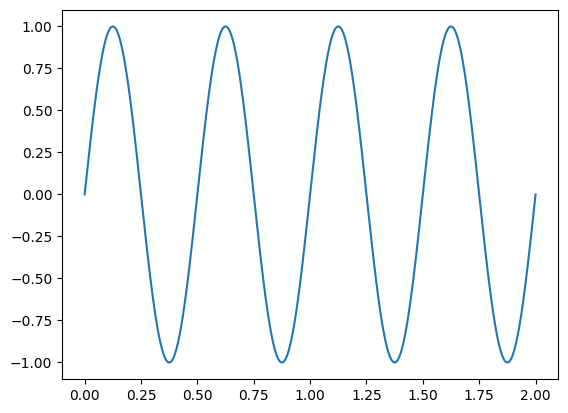

In [21]:
starttime = 0.0
endtime = 2.0
steps = 5000
t = np.linspace(starttime, endtime, num=steps)

theta = [2,4,12] # these are the frequencies
f = np.sin(2*np.pi*theta[0]*t) #+ np.sin(2*np.pi*theta[1]*t) + np.sin(2*np.pi*theta[2]*t)
dc = np.mean(f)
print('Mean of f ', dc)

plt.plot(t, f)

## RANDOM RESERVOIR

In [22]:
from Reservoir import Reservoir
from IPReservoir import IPReservoir 

N = 250

reservoir = Reservoir(N = N, bias = True, desired_rho = 0.5, bias_range=[-0.5, 0.5])

In [23]:
s =  reservoir.predict(f)

In [24]:
s.shape

torch.Size([5000, 250])

In [25]:
W_x = reservoir.W_x
W_u = reservoir.W_u
b_u = reservoir.b_u
b_h = reservoir.b_h

In [26]:
reservoir.rho()

tensor(0.5000)

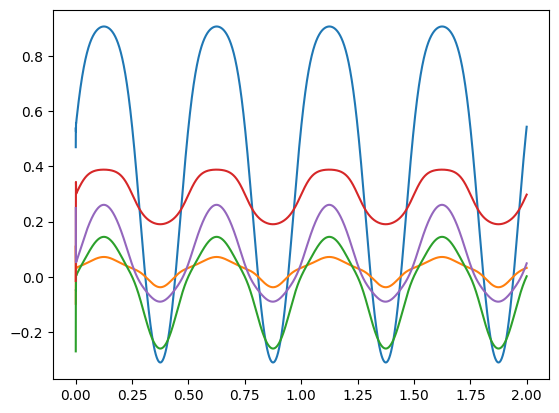

In [27]:
plt.plot(t, s[:, 0:5])

In [28]:
mean_signal = np.mean(reservoir.predict(f).numpy(), axis = 1)

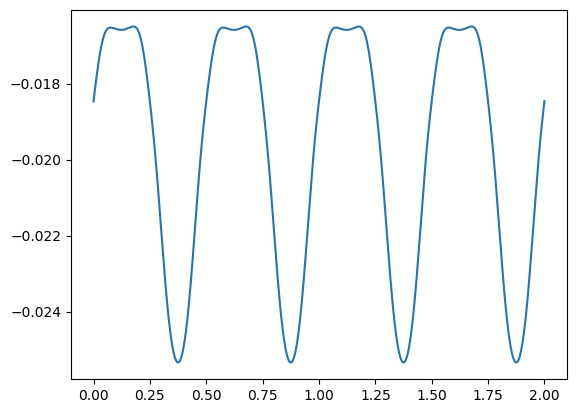

In [29]:
plt.plot(t, mean_signal)

In [30]:
from Metrics import MLLE, DeltaPhi

In [31]:
reservoir.LCE(f[0:1000])

-1.4820397

In [32]:
MLLE().evaluate(reservoir, f[0:1000])

-1.4820397

In [33]:
DeltaPhi().evaluate(reservoir)

0.21160262114216352

## RANDOM RESERVOIR - RESCALING WEIGHTS

In [34]:
reservoir.rescale_weights(0.96)

In [35]:
s =  reservoir.predict(f)

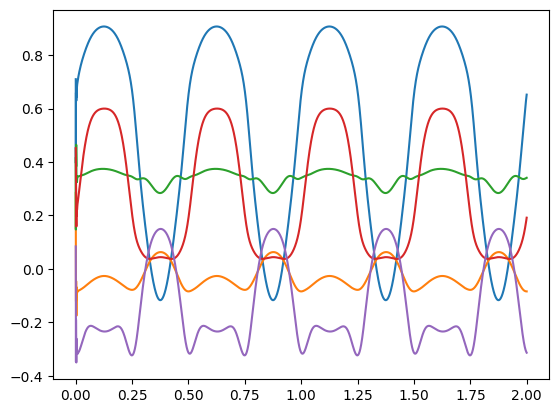

In [36]:
plt.plot(t, s[:, 0:5])

In [37]:
rescaled_mean_signal = np.mean(reservoir.predict(f).numpy(), axis = 1)

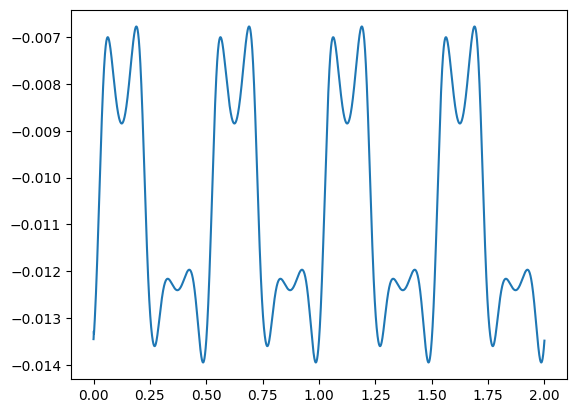

In [38]:
plt.plot(t, rescaled_mean_signal)

In [39]:
DeltaPhi().evaluate(reservoir)

0.42328629911118903

In [40]:
MLLE().evaluate(reservoir, U=f[0:1000])

-0.8794907

## UNIMODAL

In [41]:
from IntrinsicPlasticity import IPMask

In [42]:
ip_res = IPReservoir(N=N, bias = True, mask=IPMask.normalMask(N))

In [43]:
ip_res.W_x  = W_x
ip_res.W_u  = W_u 
ip_res.b_u  = b_u 
ip_res.b_h  = b_h 

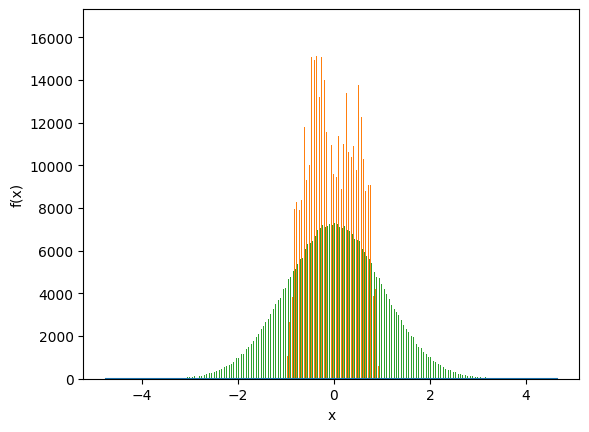

In [44]:
ip_res.pre_train(f, 0, 0)
signals =ip_res.predict(f, save_gradients=False, save_states=True)
ip_res.plot_neural_activity()

In [45]:
ip_res.pre_train(eta=0.000025, U=f, epochs=5)

- Epoch: 1) | KL Divergence value: 0.6127045750617981. | Spectral radius: 0.5483875274658203
- Epoch: 2) | KL Divergence value: 0.6154042482376099. | Spectral radius: 0.5927281975746155
- Epoch: 3) | KL Divergence value: 0.6180164217948914. | Spectral radius: 0.6335130333900452
- Epoch: 4) | KL Divergence value: 0.620564877986908. | Spectral radius: 0.6714194416999817
- Epoch: 5) | KL Divergence value: 0.623078465461731. | Spectral radius: 0.7069460153579712


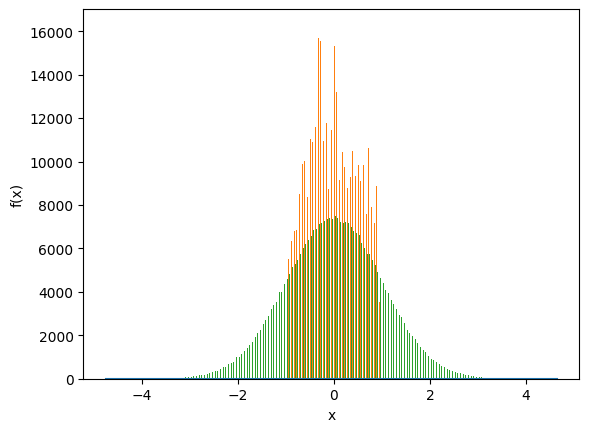

In [46]:
ip_res.pre_train(f, 0, 0)
signals = ip_res.predict(f, save_gradients=False, save_states=True).numpy()
ip_res.plot_neural_activity()

In [47]:
ip_mean_sinusoid = np.mean(signals, axis = 1)

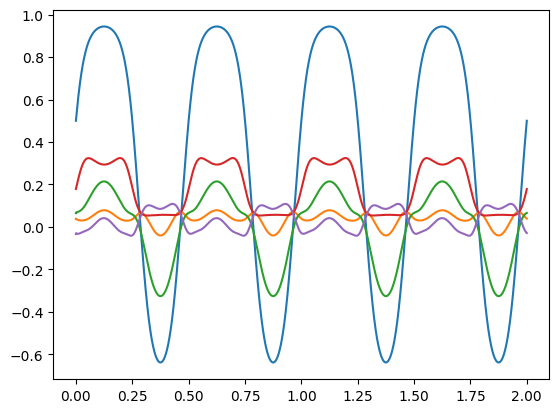

In [48]:
plt.plot(t, ip_res.predict(f).detach()[:, 0:5])

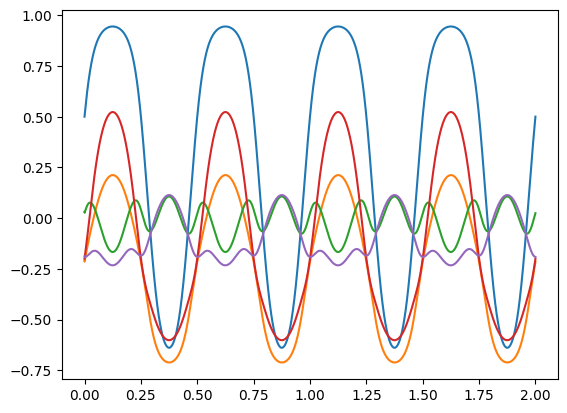

In [49]:
plt.plot(t, ip_res.predict(f).detach()[:,[0,15, 23, 45, 78]])

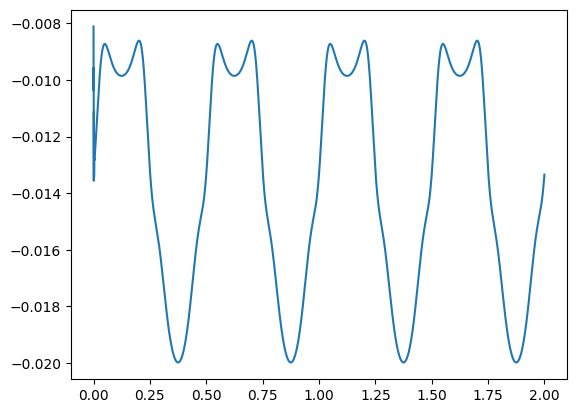

In [50]:
plt.plot(t, ip_mean_sinusoid)

In [51]:
DeltaPhi().evaluate(ip_res)

0.2911090329760004

In [52]:
MLLE().evaluate(ip_res, f[0:1000])

-1.3890803

In [53]:
ip_res.rho()

tensor(0.7069)

## BIMODAL

In [54]:
bimodal_res = IPReservoir(N=N, mask=IPMask.bimodal(N), desired_rho=0.5, bias=False)

In [55]:
bimodal_res.W_x  = W_x
bimodal_res.W_u  = W_u 
bimodal_res.b_u  = b_u 
bimodal_res.b_h  = b_h 

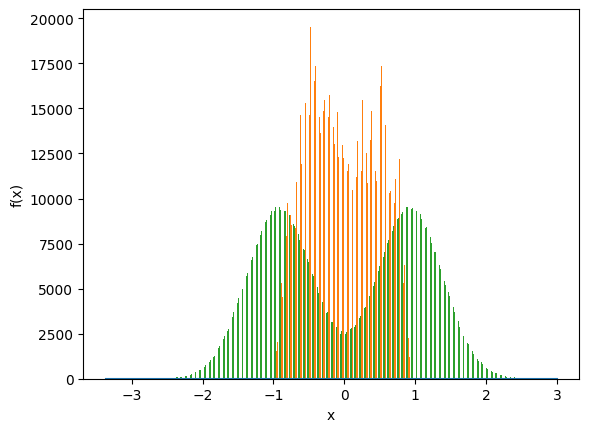

In [56]:
bimodal_res.pre_train(f, 0, 0)
bimodal_res.predict(f, save_gradients=False, save_states=True)
bimodal_res.plot_neural_activity()

In [57]:
bimodal_res.pre_train(f, 0.000005, 10)

- Epoch: 1) | KL Divergence value: 0.4945237636566162. | Spectral radius: 0.5316653251647949
- Epoch: 2) | KL Divergence value: 0.4689958393573761. | Spectral radius: 0.5695384740829468
- Epoch: 3) | KL Divergence value: 0.4475541114807129. | Spectral radius: 0.6159032583236694
- Epoch: 4) | KL Divergence value: 0.43000179529190063. | Spectral radius: 0.6749114990234375
- Epoch: 5) | KL Divergence value: 0.416065514087677. | Spectral radius: 0.7502163052558899
- Epoch: 6) | KL Divergence value: 0.40543511509895325. | Spectral radius: 0.8393095135688782
- Epoch: 7) | KL Divergence value: 0.39777225255966187. | Spectral radius: 0.9440945982933044
- Epoch: 8) | KL Divergence value: 0.39276373386383057. | Spectral radius: 1.0692156553268433
- Epoch: 9) | KL Divergence value: 0.39023032784461975. | Spectral radius: 1.2173693180084229
- Epoch: 10) | KL Divergence value: 0.3902001976966858. | Spectral radius: 1.3876032829284668


In [58]:
bimodal_res.pre_train(f, 0.0000025, 2)

- Epoch: 1) | KL Divergence value: 0.3909894824028015. | Spectral radius: 1.4814728498458862
- Epoch: 2) | KL Divergence value: 0.39224961400032043. | Spectral radius: 1.5816024541854858


In [59]:
bimodal_res.pre_train(f, -0.0000005, 2)

- Epoch: 1) | KL Divergence value: 0.39195939898490906. | Spectral radius: 1.5610581636428833
- Epoch: 2) | KL Divergence value: 0.39168745279312134. | Spectral radius: 1.5407711267471313


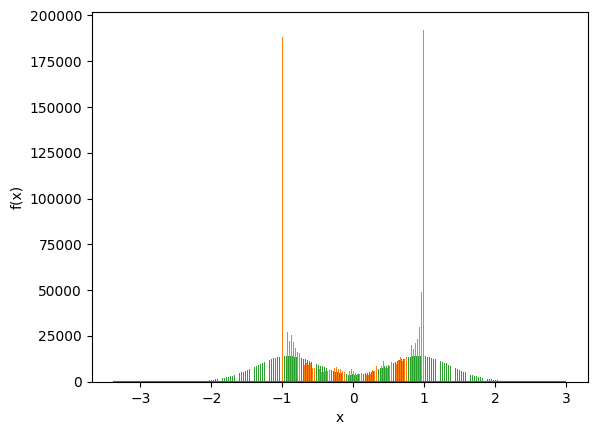

In [60]:
bimodal_res.pre_train(f, 0, 0)
bimodal_res.predict(f, save_gradients=False, save_states=True)
bimodal_res.plot_neural_activity()

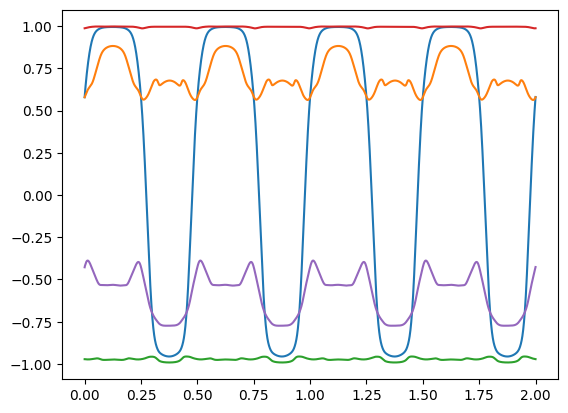

In [61]:
plt.plot(t, bimodal_res.predict(f).detach()[:, 0:5])

In [62]:
bimodal_mean_sinusoid = np.mean(bimodal_res.predict(f).detach().numpy(), axis=1)

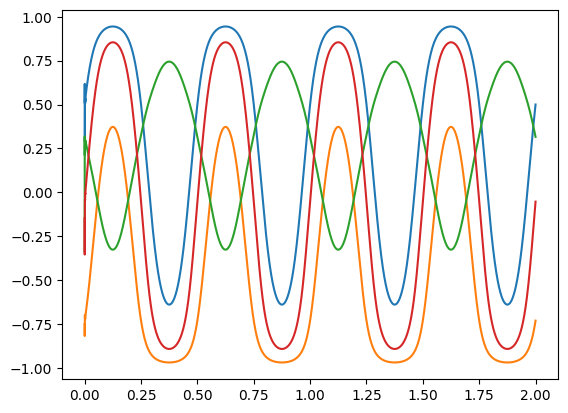

In [63]:
plt.plot(t, ip_res.predict(f).detach()[:, [0, 91, 43, 21]])

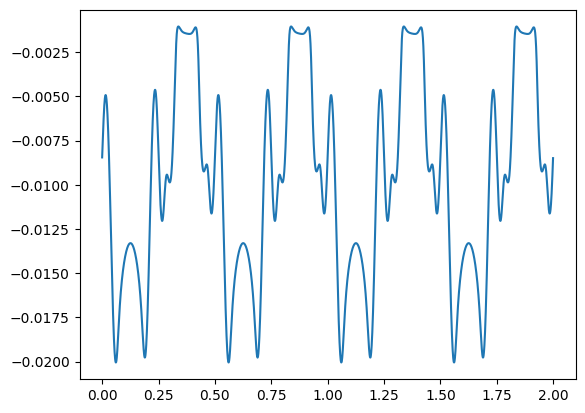

In [64]:
plt.plot(t, bimodal_mean_sinusoid)

In [65]:
DeltaPhi().evaluate(bimodal_res)

0.6417675294601728

In [66]:
MLLE().evaluate(bimodal_res, f[0:1000])

-2.0937052

In [67]:
bimodal_res.rho()

tensor(1.5408)

## TRIMODAL

In [68]:
trimodal_res = IPReservoir(N=N, desired_rho=0.5, mask=IPMask.trimodal(N, (1-1/np.pi)), bias=True)

In [69]:
trimodal_res.W_x  = W_x
trimodal_res.W_u  = W_u 
trimodal_res.b_u  = b_u 
trimodal_res.b_h  = b_h 

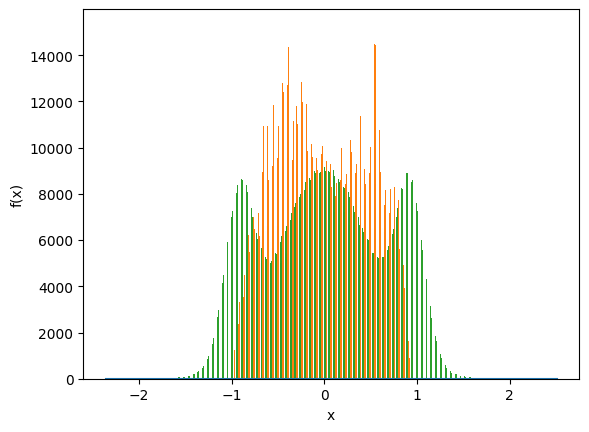

In [70]:
trimodal_res.pre_train(f, 0, 0)
trimodal_res.predict(f, save_gradients=False, save_states=True)
trimodal_res.plot_neural_activity()

In [71]:
trimodal_res.pre_train(f, -0.0000005, 5)

- Epoch: 1) | KL Divergence value: 0.3350822925567627. | Spectral radius: 0.4928615093231201
- Epoch: 2) | KL Divergence value: 0.34629908204078674. | Spectral radius: 0.486648827791214
- Epoch: 3) | KL Divergence value: 0.35759902000427246. | Spectral radius: 0.4815062880516052
- Epoch: 4) | KL Divergence value: 0.3686301112174988. | Spectral radius: 0.4771834909915924
- Epoch: 5) | KL Divergence value: 0.37909361720085144. | Spectral radius: 0.4732966125011444


In [72]:
trimodal_res.pre_train(f, -0.00000025, 1)

- Epoch: 1) | KL Divergence value: 0.3840365707874298. | Spectral radius: 0.47147759795188904


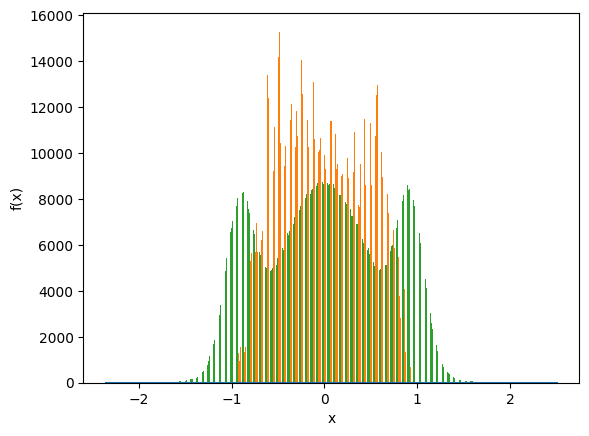

In [73]:
trimodal_res.pre_train(f, 0, 0)
trimodal_res.predict(f, save_gradients=False, save_states=True)
trimodal_res.plot_neural_activity()

In [74]:
trimodal_mean_sinusoid = np.mean(trimodal_res.predict(f).detach().numpy(), axis = 1)

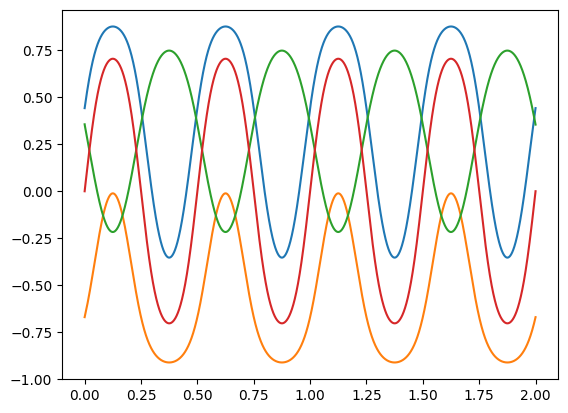

In [75]:
plt.plot(t,  trimodal_res.predict(f).detach()[:,[0, 91, 43, 21]])

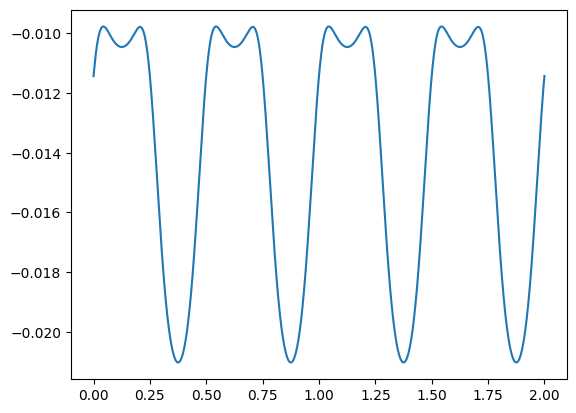

In [76]:
plt.plot(t, trimodal_mean_sinusoid)

In [77]:
DeltaPhi().evaluate(trimodal_res)

0.148220066940341

In [78]:
MLLE().evaluate(trimodal_res, f[0:1000])

-1.4031093

## COMPARISON 

Text(0.5, 1.0, 'Output signal averaged over all the recurrent units of each Reservoir')

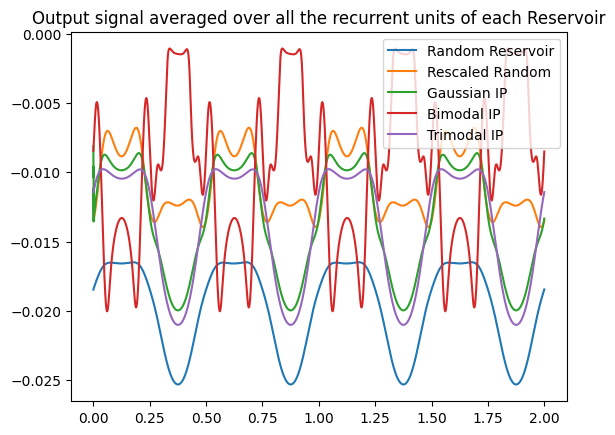

In [79]:
plt.plot(t, mean_signal,t, rescaled_mean_signal, t, ip_mean_sinusoid, t, bimodal_mean_sinusoid,  t, trimodal_mean_sinusoid)
plt.legend(["Random Reservoir", "Rescaled Random", "Gaussian IP", "Bimodal IP", "Trimodal IP"])
plt.title("Output signal averaged over all the recurrent units of each Reservoir")

We can easily notice that the random Reservoir and the Gaussian one are the ones producing the more linear output, in the sense that it follows the shape of the input sine wave basically rescaling it at different orders of magnitude.On the other hand, what the other reservoirs produce is slightly more complex than a sine wave, highlighting the fact that the main control parameter is actually the spectral radius, regulating aspects of the memory-lenght [citare Jaeger e Verstaten-Dambre] and more in general the "closeness" to the bound of the stability (and which has also  been used during the training process as a guard for the stability of the IP optimization process). 